In [1]:
import queue1 as qu 
from random import randint
import random as rm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d
from matplotlib.pyplot import figure

In [ ]:
sum_ = 0
for i in range(100):
    r_ = rm.expovariate(1/2)
    print(r_)
    sum_ += r_
print(sum_)

### e - онлайн платформа

In [2]:
days = 50
rooms = 100
tet = 0.2
we = 180
wh = 200
lam_e = 20
lam_h = 30
u=0.5


def profit_split(q, wh=wh, we=we, tet=tet, lam_e=lam_e, lam_h=lam_h, u=u, days=days):
    queue_front_desk = qu.Queue(days=days, rooms=rooms - q, price=wh, lam=lam_h, u=u)
    queue_online = qu.Queue(days=days,rooms=q, price=we, lam=lam_e, u=u)
    return (sum(queue_front_desk.profit)+sum(queue_online.profit)*(1-tet))/days

def profit_share(wh=wh, we=we, lam_e=lam_e, lam_h=lam_h, u=u, tet=tet, days=days):
    queue = qu.CompleteSharing(days=days, price_of=wh, price_on=we, tet=tet, lam_online=lam_e, lam_offline=lam_h, u=u)
    return sum(queue.profit)/days


In [3]:
from math import factorial as fact
Q = 100 

def Pi_h_f(wh=wh, we=we, lam_h=lam_h, lam_e=lam_e, q=0, tet=tet, u=u):
    return \
        (wh*lam_h/u)*\
        (1 - (lam_h**(Q-q))/((u**(Q-q)*fact(Q-q))*(sum([lam_h**k/(u**k * fact(k)) \
                                                    for k in range(Q-q+1)])))) + \
        ((1-tet)*we*lam_e/u)*\
        (1 - (lam_e**q)/((u**(q)*fact(q))*(sum([lam_e**k/(u**k * fact(k)) \
                                                    for k in range(q+1)]))))


In [4]:
Pi = max(Pi_h_f(q=q) for q in range(100))
for i in range(100):
    if Pi_h_f(q=i) == Pi:
        q_max = i
        break

print(Pi)
print(profit_split(q_max))
print(profit_share())


15990.776143645278
13576.48
13884.8


80884


<AxesSubplot:xlabel='days', ylabel='profit_split'>

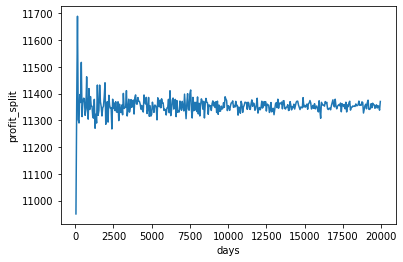

In [12]:
Pi = max(Pi_h_f(q=q) for q in range(100))
q_max = 0

for i in range(100):
    if Pi_h_f(q=i) == Pi:
        q_max = i
        break

seed = randint(0,10**5)
rm.seed(seed)
print(seed)

step = 5
df = pd.DataFrame()
df['days'] = [i*10 for i in range(5, 2000, step)]
df['profit_split'] =[profit_split(q=q_max, days=days*10) for days in range(5, 2000, step)]

sns.lineplot(data=df, x="days", y="profit_split")

##  Фактор стоимости бронирования (wh и we) 

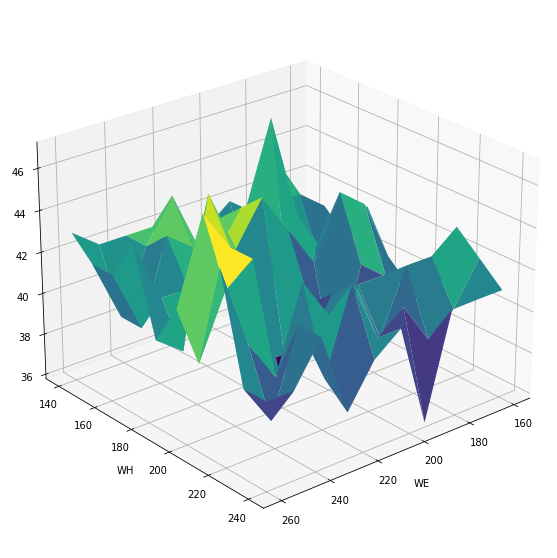

In [28]:
size = 10
we_ = np.linspace(160, 260, size)
wh_ = np.linspace(140, 240, size)

X, Y = np.meshgrid(we_, wh_)

Z_optimal = [[0 for _ in range(size)] for _ in range(size)]
q_optimal = [[-1 for _ in range(size)] for _ in range(size)]

for q_now in range(30, 60, 1):
    for i in range(size):
            for j in range(size):
                profit_ = profit_split(we=X[i][j], wh=Y[i][j], q=q_now, days=1000)
                if Z_optimal[i][j] < profit_:
                    Z_optimal[i][j] = profit_
                    q_optimal[i][j] = q_now
                
Z = np.array(q_optimal)

figure(figsize=(10,10))
ax = plt.axes(projection ='3d') 
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis')

plt.xlabel("WE")
plt.ylabel("WH")
ax.view_init(25, 50) #  поворачиваем график
plt.show()

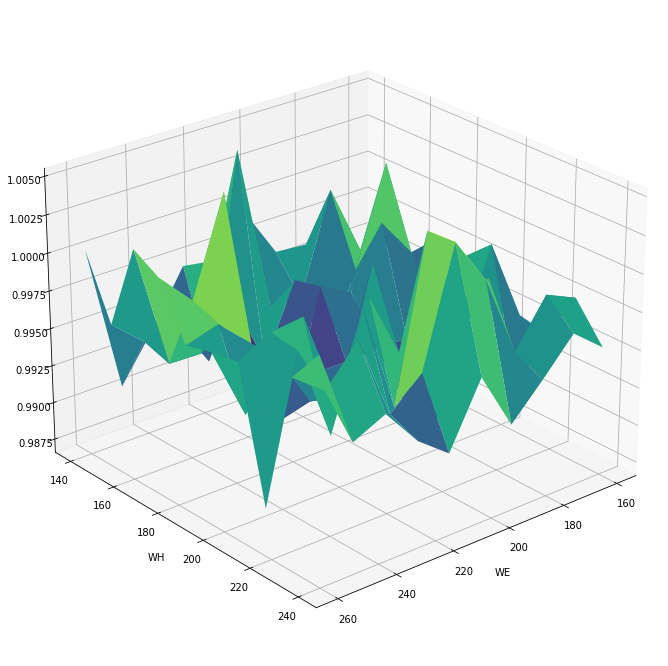

In [31]:
'''size = 10
we_ = np.linspace(100, 200, size)
wh_ = np.linspace(200, 300, size)

X, Y = np.meshgrid(we_, wh_)

Z_optimal = [[0 for _ in range(size)] for _ in range(size)]

for q_now in range(20, 80, 2):
   for i in range(size):
        for j in range(size):
            profit_ = profit_split(we=X[i][j], wh=Y[i][j], q=q_now, days=5000)
            if Z_optimal[i][j] < profit_:
                Z_optimal[i][j] = profit_
'''
Z = np.array(Z_optimal)

alpha = Z/profit_share(we=X, wh=Y, days=10000)

figure(figsize=(12, 12))
ax = plt.axes(projection ='3d') 
ax.plot_surface(X, Y, alpha, rstride=1, cstride=1, cmap='viridis')

plt.xlabel("WE")
plt.ylabel("WH")
ax.view_init(25, 50) #  поворачиваем график
plt.show()

## Фактор доли стоимости бронирования в качестве комиссии (tet)

<AxesSubplot:xlabel='tet', ylabel='q*'>

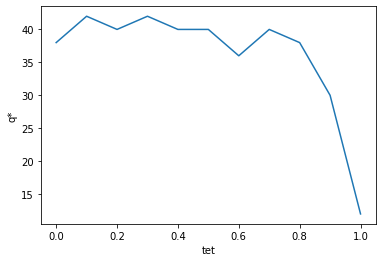

In [40]:
df = pd.DataFrame() 
df['tet'] = [tet_/10 for tet_ in range(11)]

Pi_optimal = [0 for _ in range(11)]
q_optimal = [0 for _ in range(11)]

for tet_ in range(11):
    for q_now in range(0, 60, 2):
        profit_ = profit_split(q=q_now, tet=tet_/10, days=2000)
        if Pi_optimal[tet_] < profit_:
            Pi_optimal[tet_] = profit_
            q_optimal[tet_] = q_now

df['q*'] = q_optimal

sns.lineplot(data=df, x="tet", y="q*")

<AxesSubplot:xlabel='tet', ylabel='alpha'>

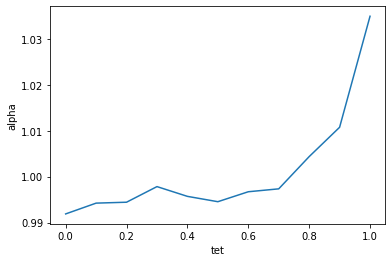

In [27]:
Pi_com_optimal = [profit_share(tet=tet_/10, days=5000) for tet_ in range(11)]
df['alpha'] = [Pi_optimal[i]/Pi_com_optimal[i] for i in range(11)]
    
sns.lineplot(data=df, x="tet", y="alpha")

 ## Фактор скорости поступления клиентов (lam e и lam h) 

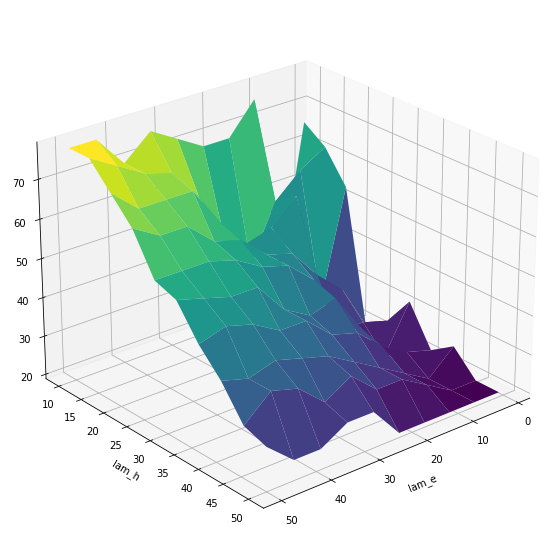

In [35]:
size = 10
lam_e_ = np.linspace(1, 50, size)
lam_h_ = np.linspace(10, 50, size)

X, Y = np.meshgrid(lam_e_, lam_h_)

Z_optimal = [[0 for _ in range(size)] for _ in range(size)]
q_optimal = [[0 for _ in range(size)] for _ in range(size)]

for q_now in range(20, 80, 2):
   for i in range(size):
        for j in range(size):
            profit_ = profit_split(lam_e=X[i][j], lam_h=Y[i][j], q=q_now, days=1000)
            if Z_optimal[i][j] < profit_:
                Z_optimal[i][j] = profit_
                q_optimal[i][j] = q_now
   
Z = np.array(q_optimal)

figure(figsize=(10,10))

ax = plt.axes(projection ='3d') 
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis')

plt.xlabel("lam_e")
plt.ylabel("lam_h")
ax.view_init(25, 50) #  поворачиваем график
plt.show()


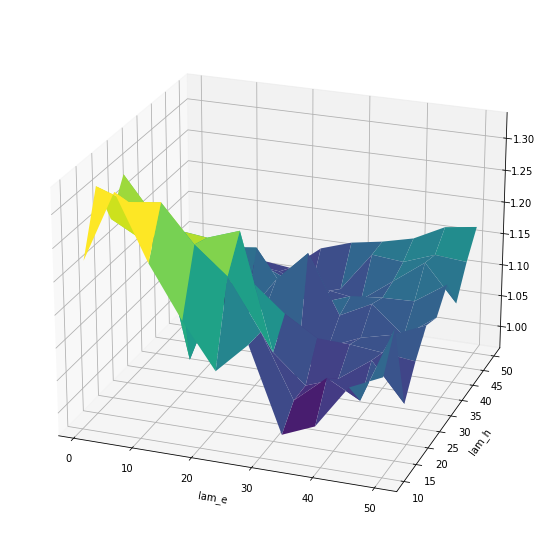

In [34]:
Z = np.array(Z_optimal)

alpha = [[0 for _ in range(size)] for _ in range(size)]
for i in range(size):
    for j in range(size):
        alpha[i][j] = Z[i][j] / profit_share(lam_e=X[i][j], lam_h=Y[i][j], days=1000)

Z = np.array(alpha)
figure(figsize=(10, 10))

ax = plt.axes(projection ='3d') 
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis')

plt.xlabel("lam_e")
plt.ylabel("lam_h")
ax.view_init(23, -90+20) #  поворачиваем график
plt.show()

## Фактор ожидаемого времени пребывания клиентов в отеле u 

<AxesSubplot:xlabel='1/u', ylabel='q*'>

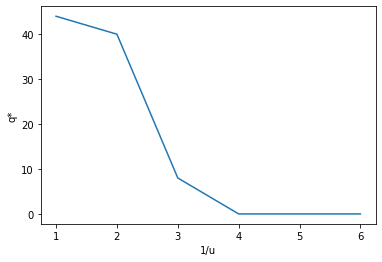

In [8]:
df = pd.DataFrame() 
df['1/u'] = [i for i in range(1, 7)]

Pi_optimal = [0 for _ in range(1, 7)]
q_optimal = [0 for _ in range(1, 7)]

for u_ in range(1, 7):
    for q_now in range(0, 60, 2):
        profit_ = profit_split(wh=200, we=180, q=q_now ,u=1/u_, lam_h=40, lam_e=30, days=1000)
        if Pi_optimal[u_-1] < profit_: 
            Pi_optimal[u_-1] = profit_ 
            q_optimal[u_-1]=q_now


df['q*'] = q_optimal
    
sns.lineplot(data=df, x="1/u", y="q*")

<AxesSubplot:xlabel='1/u', ylabel='alpha'>

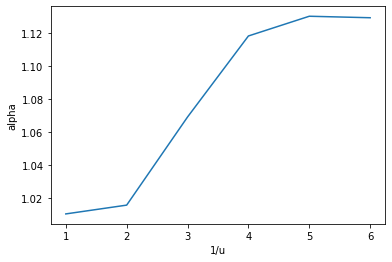

In [23]:
Pi_com_optimal = [profit_share(u=1/i, wh=200, we=180, lam_h=40, lam_e=30, days=1000) for i in range(1, 7)]
df['alpha'] = [Pi_optimal[i]/Pi_com_optimal[i] for i in range(len(Pi_com_optimal))]
sns.lineplot(data=df, x="1/u", y="alpha")